<a href="https://colab.research.google.com/github/GuiSSant/ProjetoEstatistica/blob/main/Projeto_Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title **Importar biblioteca pandas** { vertical-output: true, form-width: "60%" }
import pandas as pd

In [ ]:
#@title **Montar Google Drive e dar permissão** { vertical-output: true, form-width: "30%" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Projeto
%ls

/content/drive/MyDrive/Colab Notebooks/Projeto
Aula2.ipynb                 Projeto_Codigo.ipynb          vaccinations-by-age-group.csv
Aula3.ipynb                 SINASC_2020_comp.csv
covid-hospitalizations.csv  total_deaths_per_million.csv


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Importando Base **covid-hospitalizations.csv**

In [ ]:
hospitalDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projeto/covid-hospitalizations.csv")
hospitalDf.head()

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000


Importando Base **vaccinations-by-age-group.csv**

In [ ]:
vacinaDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projeto/vaccinations-by-age-group.csv")
vacinaDf.head()

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.0,0.0,0.0
1,Argentina,2020-01-01,12-17,0.0,0.0,0.0
2,Argentina,2020-01-01,18-29,0.0,0.0,0.0
3,Argentina,2020-01-01,3-11,0.0,0.0,0.0
4,Argentina,2020-01-01,30-39,0.0,0.0,0.0


Exibir locais presentes na base de hospitalização

In [ ]:
#Exibir todos os países na base de hospitalização
hospitalDfPaises = set(hospitalDf['entity'].unique())
pd.DataFrame(hospitalDfPaises)

,0
0,South Africa
1,Belgium
2,Chile
3,Portugal
4,Ireland
5,Algeria
6,Greece
7,Romania
8,United Kingdom
9,Estonia


Exibir locais presentes na base de vacinação

In [ ]:
#Exibir todos os países na base de vacinação
vacinaDfPaises = set(vacinaDf['location'].unique())
pd.DataFrame(vacinaDfPaises)

,0
0,Belgium
1,Jersey
2,Peru
3,Portugal
4,Ireland
5,Romania
6,Estonia
7,France
8,Japan
9,Denmark


Criar intersecção entre locais presentes nas bases de hospitalização e vacinação

In [ ]:
#@title **Criar intersecção entre locais presentes nas bases de hospitalização e vacinação**

paisesComum = vacinaDfPaises.intersection(hospitalDfPaises)
pd.DataFrame(paisesComum)

,0
0,Belgium
1,Portugal
2,Ireland
3,Romania
4,Estonia
5,France
6,Japan
7,Denmark
8,Australia
9,Italy


In [ ]:
#@title **Calcular Média e Mediana de Ocupação de hospitais e ICU em diferentes semestres entre 2020 e 2023**

# Função para calcular a média e mediana de um semestre
def calcularMediaSemHospital(df, ano, semestre, dataInicio, dataFim):
    # Filtrar os dados
    filtro =  ((df['indicator'] == 'Daily ICU occupancy per million') | \
              (df['indicator'] == 'Daily hospital occupancy per million')) & \
             ((df['date'] >= dataInicio) & (df['date'] <= dataFim))

    # Filtrar o DataFrame
    hospitalFiltrado = df[filtro]


    # Criando tabela pivoteada e garantindo que não haja NaNs
    dfPivotHospital = hospitalFiltrado.pivot_table(index="date", columns="indicator", values="value", aggfunc='sum').reset_index()

    dfPivotHospital.columns = ["date", "ICU_per_million", "hospital_per_million"]

    # Preencher possíveis valores NaN com 0
    dfPivotHospital = dfPivotHospital.fillna(0)

    # criando coluna de "Total Diário" contendo a soma de ocupação diária de ICU e hospitais
    dfPivotHospital['total_diario'] = dfPivotHospital[["ICU_per_million", "hospital_per_million"]].sum(axis=1)

    # Agrupar por 'date' e somar 'total_diario'
    hospitalAgrupado = dfPivotHospital.groupby(['date'], as_index=False)['total_diario'].sum()


    # Calcular a média do semestre
    hospitalSemestreMedia = hospitalAgrupado['total_diario'].mean()

    #fazer sort e calcular mediana do semestre
    hospitalAgrupadoOrdenado = hospitalAgrupado.sort_values(by='total_diario')
    hospitalsemestreMediana = hospitalAgrupadoOrdenado['total_diario'].median()

    #criar a nova entrada de informações do semestre
    novaEntrada = {'Ano': ano, 'Semestre': semestre, 'Média de Ocupação por milhão': hospitalSemestreMedia, 'Mediana de Ocupação por milhão': hospitalsemestreMediana}
    mediaGeralHospital.append(novaEntrada)



mediaGeralHospital = []
anos = [2020, 2021, 2022, 2023]


for ano in anos:

  # Filtrar a base de hospitalização
  hospitalDfFiltrado = hospitalDf[hospitalDf['entity'].isin(paisesComum)]

  # Definir os intervalos dos semestres
  inicioSemestre1 = str(str(ano)+'-01-01')
  fimSemestre1 = str(str(ano)+'-06-30')
  inicioSemestre2 = str(str(ano)+'-07-01')
  fimSemestre2 = str(str(ano)+'-12-31')

  # Calcular as médias/medianas dos semestres
  calcularMediaSemHospital(
      hospitalDfFiltrado, ano, 1, inicioSemestre1, fimSemestre1
  )
  calcularMediaSemHospital(
      hospitalDfFiltrado, ano, 2, inicioSemestre2, fimSemestre2
  )


  dfMediaOcupacaoSemestral = pd.DataFrame(mediaGeralHospital)


# Exibir os resultados
dfMediaOcupacaoSemestral


,Ano,Semestre,Média de Ocupação por milhão,Mediana de Ocupação por milhão
0,2020,1,1453.453221,1114.0400
1,2020,2,3433.987701,1503.2705
2,2021,1,5923.007514,6876.2680
3,2021,2,3587.488478,3247.7110
4,2022,1,4275.984851,4121.5310
5,2022,2,2236.248125,2244.3490
6,2023,1,1040.522547,1137.2850
7,2023,2,320.089060,297.8390


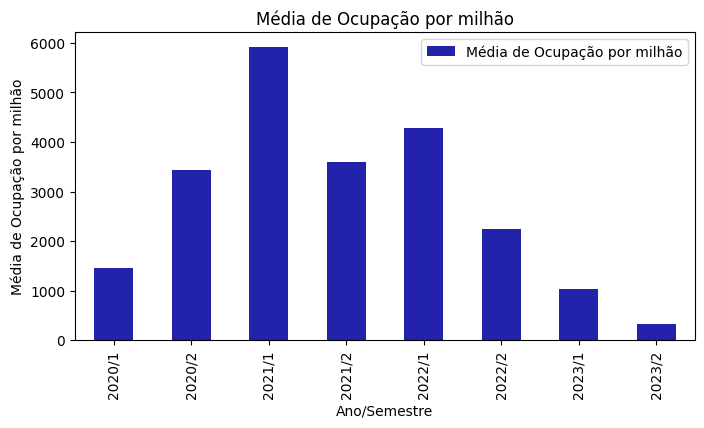

In [ ]:
#@title **Criar gráfico de barras da tabela acima**

from matplotlib import pyplot as plt

dfMediaOcupacaoSemestral['ano_semestre'] = dfMediaOcupacaoSemestral['Ano'].astype(str) + '/' + dfMediaOcupacaoSemestral['Semestre'].astype(str)

dfMediaOcupacaoSemestral.plot(
    x='ano_semestre',
    y='Média de Ocupação por milhão',
    kind='bar',
    figsize=(8, 4),
    title='Média de Ocupação por milhão',
    color='#2222aa'
)



plt.gca().spines[['top', 'right']].set_visible(True)

plt.xlabel('Ano/Semestre')
plt.ylabel('Média de Ocupação por milhão')

plt.show()

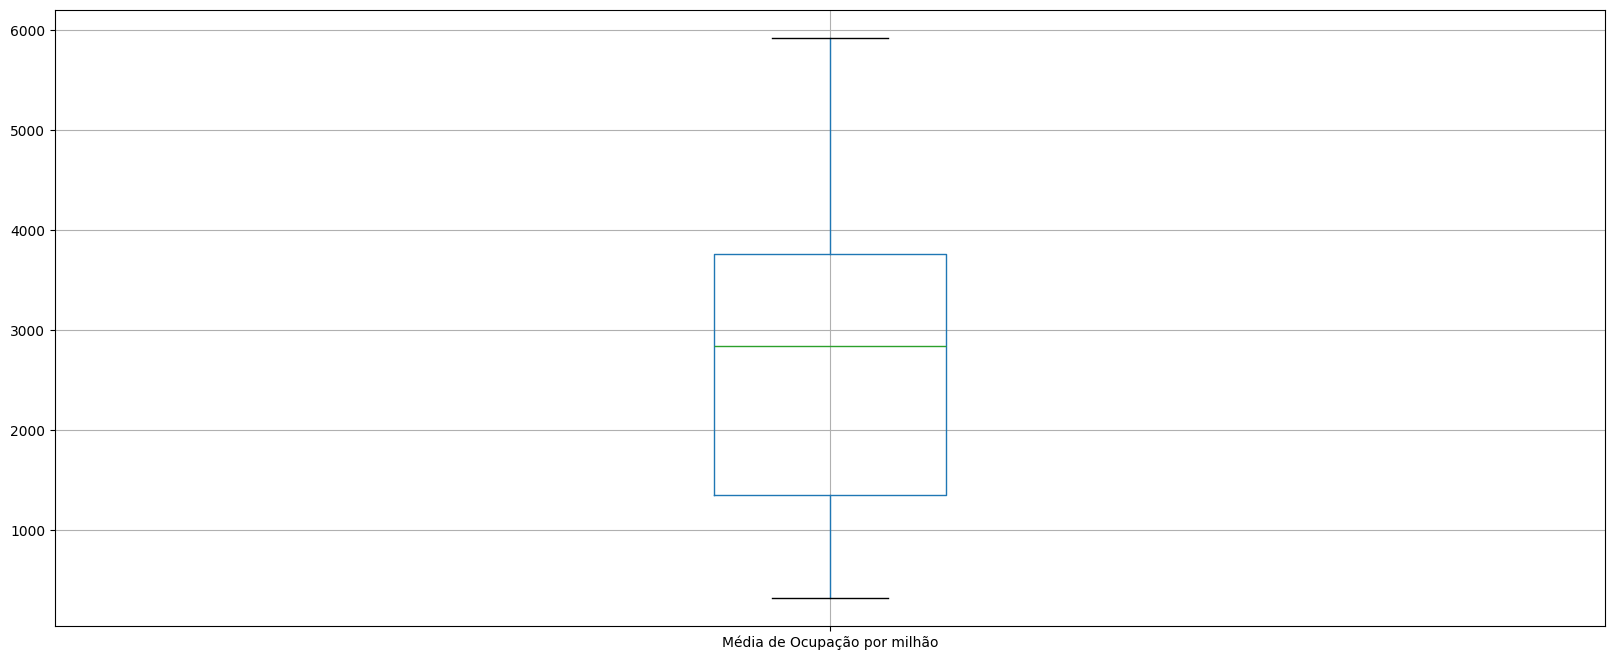

In [ ]:
#@title **BoxPlot Média de Ocupação por milhão(Semestral)**

bp = dfMediaOcupacaoSemestral.boxplot(column=['Média de Ocupação por milhão'], figsize=(20,8))

In [ ]:
#@title **Calcular Média e Mediana de Ocupação de hospitais e ICU em diferentes meses entre 2020 e 2023**

import pandas as pd

# Função para calcular a média mensal
def calcularMediaMesHospital(df, ano, mes, dataInicio, dataFim):
    # Filtrar os dados
    filtro =  ((df['indicator'] == 'Daily ICU occupancy per million') | \
              (df['indicator'] == 'Daily hospital occupancy per million')) & \
             ((df['date'] >= dataInicio) & (df['date'] <= dataFim))

    # Filtrar o DataFrame
    hospitalFiltrado = df[filtro]


    # Criando tabela pivoteada e garantindo que não haja NaNs
    dfPivotHospital = hospitalFiltrado.pivot_table(index="date", columns="indicator", values="value", aggfunc='sum').reset_index()

    # Verificar se todas as colunas esperadas existem
    colunasExistem = ['Daily ICU occupancy per million', 'Daily hospital occupancy per million']
    for coluna in colunasExistem:
        if coluna not in dfPivotHospital.columns:
            dfPivotHospital[coluna] = 0  # Adicionar coluna ausente com valores 0

    #determinar colunas de dfPivotHospital
    dfPivotHospital.columns = ["date", "ICU_per_million", "hospital_per_million", ]

    # Preencher possíveis valores NaN com 0
    dfPivotHospital = dfPivotHospital.fillna(0)

    dfPivotHospital['total_diario'] = dfPivotHospital[["ICU_per_million", "hospital_per_million"]].sum(axis=1)

    # Agrupar por 'date' e somar 'total_diario'
    hospitalAgrupado = dfPivotHospital.groupby(['date'], as_index=False)['total_diario'].sum()


    # Calcular a média do mês
    hospitalMesMedia = hospitalAgrupado['total_diario'].mean()

    #fazer sort e calcular mediana do mês
    hospitalAgrupadoOrdenado = hospitalAgrupado.sort_values(by='total_diario')
    hospitalMesMediana = hospitalAgrupadoOrdenado['total_diario'].median()


    # Adicionar a nova entrada à lista
    novaEntrada = {
        'Ano': ano,
        'Mês': mes,
        'Média de Ocupação por milhão': hospitalMesMedia,
        'Mediana de Ocupação por milhão': hospitalMesMediana
    }
    mediaGeralHospital.append(novaEntrada)

# Lista para armazenar as médias mensais
mediaGeralHospital = []

# Lista de anos para análise
anos = [2020, 2021, 2022, 2023]

# Loop para calcular as médias mensais
for ano in anos:
    # Filtrar a base de hospitalização
    hospitalDfFiltrado = hospitalDf[hospitalDf['entity'].isin(paisesComum)]

    # Loop para cada mês do ano
    for mes in range(1, 13):  # Meses de 1 a 12
        # Definir o primeiro e o último dia do mês
        dataInicio = f'{ano}-{mes:02d}-01'  # Formato YYYY-MM-DD
        if mes == 12:
            dataFim = f'{ano}-12-31'  # Último dia de dezembro
        else:
            dataFim = f'{ano}-{mes+1:02d}-01'  # Primeiro dia do próximo mês

        # Calcular a média do mês
        calcularMediaMesHospital(
            hospitalDfFiltrado, ano, mes, dataInicio, dataFim
        )

# Criar o DataFrame com as médias mensais
dfMediaOcupacaoMensal = pd.DataFrame(mediaGeralHospital)

# Exibir o DataFrame
dfMediaOcupacaoMensal

,Ano,Mês,Média de Ocupação por milhão,Mediana de Ocupação por milhão
0,2020,1,0.754000,0.7540
1,2020,2,6.802125,5.4970
2,2020,3,853.972844,412.6325
3,2020,4,3165.676839,3317.8380
4,2020,5,1589.828469,1508.5845
5,2020,6,674.795968,646.1590
6,2020,7,567.690781,556.7455
7,2020,8,734.053406,717.5090
8,2020,9,1120.844806,1094.5950
9,2020,10,3132.779625,2525.1535


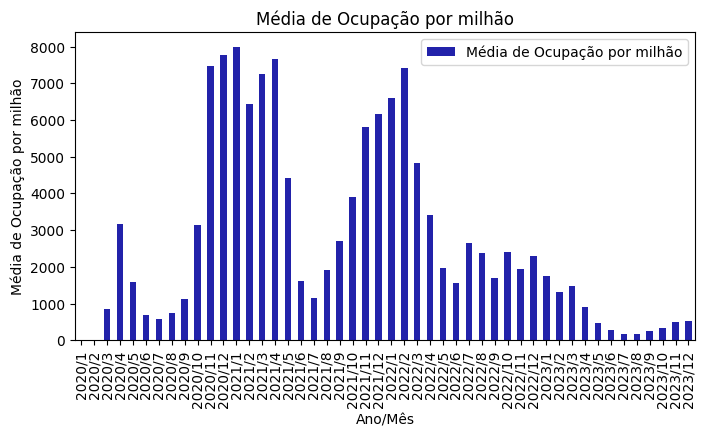

In [ ]:
#@title **Criar gráfico de barras da tabela acima**

from matplotlib import pyplot as plt

dfMediaOcupacaoMensal['ano_mes'] = dfMediaOcupacaoMensal['Ano'].astype(str) + '/' + dfMediaOcupacaoMensal['Mês'].astype(str)

dfMediaOcupacaoMensal.plot(
    x='ano_mes',
    y=['Média de Ocupação por milhão'],
    kind='bar',
    figsize=(8, 4),
    title='Média de Ocupação por milhão',
    color='#2222aa'
)



plt.gca().spines[['top', 'right']].set_visible(True)

plt.xlabel('Ano/Mês')
plt.ylabel('Média de Ocupação por milhão')

plt.show()

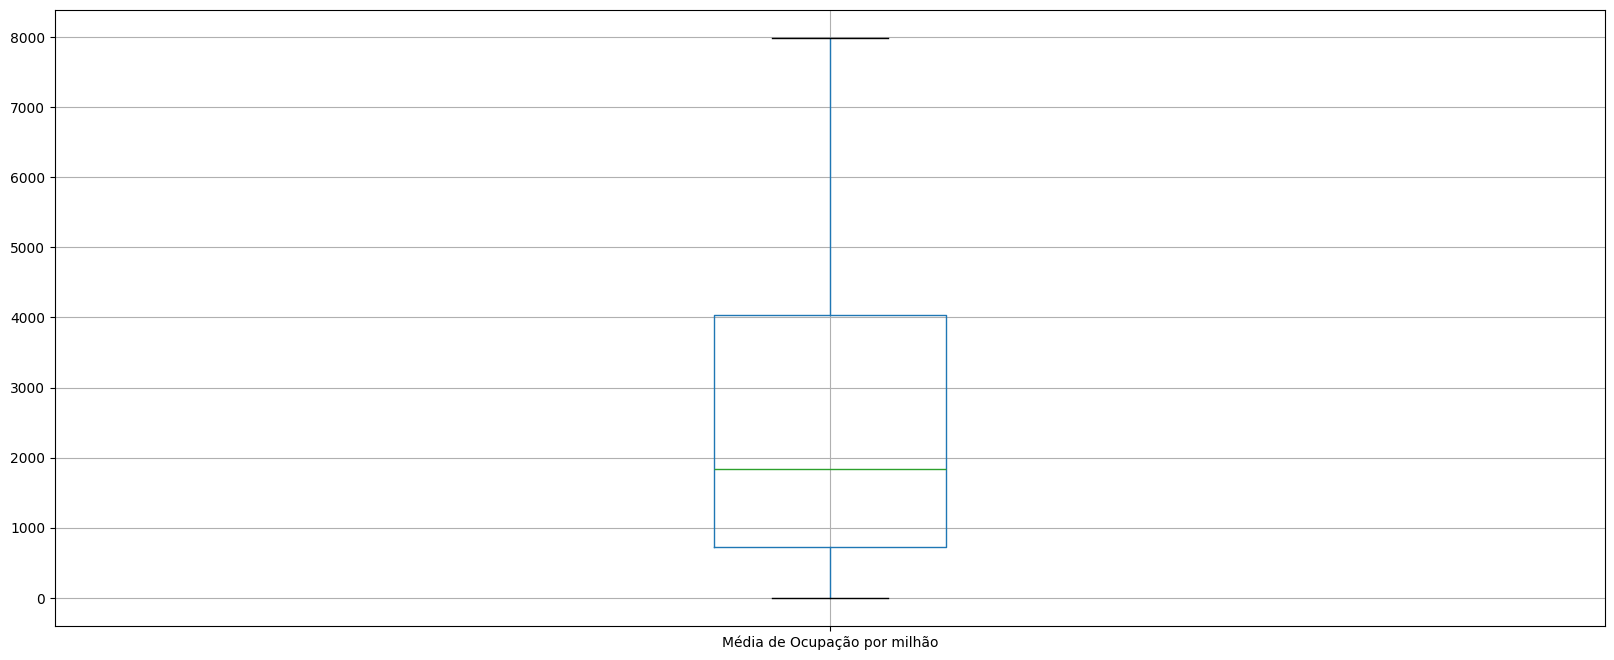

In [ ]:
#@title **BoxPlot Média de Ocupação por milhão(Mensal)**

bp = dfMediaOcupacaoMensal.boxplot(column=['Média de Ocupação por milhão'], figsize=(20,8))

In [ ]:
#@title **Calcular Média de vacinação em diferentes semestres entre 2020 e 2023**


# Função para calcular a média de um semestre
def calcularMediaSemVacina(df, ano, semestre, dataInicio, dataFim):
    # Filtrar os dados
    filtro =  ((df['date'] >= dataInicio) & (df['date'] <= dataFim))

    # Filtrar o DataFrame
    vacinaFiltrado = df[filtro]

    # Agrupar por 'date' e 'location' e fazer média dos valores
    vacinaAgrupado = vacinaFiltrado.groupby(['date', 'location'], as_index=False).agg(
        {
            'people_vaccinated_per_hundred': 'mean',
            'people_fully_vaccinated_per_hundred': 'mean',
            'people_with_booster_per_hundred': 'mean'
        }
    )

    # Calcular a média do semestre de vacinados, totalmente vacinados e vacinados com reforço
    vacina1SemestreMedia = vacinaAgrupado['people_vaccinated_per_hundred'].mean()
    vacina2SemestreMedia = vacinaAgrupado['people_fully_vaccinated_per_hundred'].mean()
    vacina3SemestreMedia = vacinaAgrupado['people_with_booster_per_hundred'].mean()

    #adicionando nova entrada do semestre
    novaEntrada = {'Ano': ano, 'Semestre': semestre, 'Média de Vacinação(%)': vacina1SemestreMedia, 'Média de Vacinação Completa(%)': vacina2SemestreMedia, 'Média de Reforço(%)': vacina3SemestreMedia,}
    mediaGeralVacina.append(novaEntrada)



mediaGeralVacina = []
anos = [2020, 2021, 2022, 2023]

for ano in anos:

  # Filtrar a base de vacinação
  vacinaDfFiltrado = vacinaDf[vacinaDf['location'].isin(paisesComum)]

  # Definir os intervalos dos semestres
  inicioSemestre1 = str(str(ano)+'-01-01')
  fimSemestre1 = str(str(ano)+'-06-30')
  inicioSemestre2 = str(str(ano)+'-07-01')
  fimSemestre2 = str(str(ano)+'-12-31')

  # Calcular as médias dos semestres
  calcularMediaSemVacina(
      vacinaDfFiltrado, ano, 1, inicioSemestre1, fimSemestre1
  )
  calcularMediaSemVacina(
      vacinaDfFiltrado, ano, 2, inicioSemestre2, fimSemestre2
  )



  dfMediaVacinacaoSemestral = pd.DataFrame(mediaGeralVacina)


# Exibir os resultados
dfMediaVacinacaoSemestral


,Ano,Semestre,Média de Vacinação(%),Média de Vacinação Completa(%),Média de Reforço(%)
0,2020,1,0.000000,0.000000,0.000000
1,2020,2,0.001466,0.000000,0.000000
2,2021,1,29.649594,18.267481,0.019917
3,2021,2,70.680426,61.117873,10.003291
4,2022,1,78.087965,73.624454,43.083532
5,2022,2,74.742719,70.724362,51.500763
6,2023,1,72.712957,68.281949,54.695259
7,2023,2,80.636751,72.896930,67.720496


Criar gráfico da tabela a cima

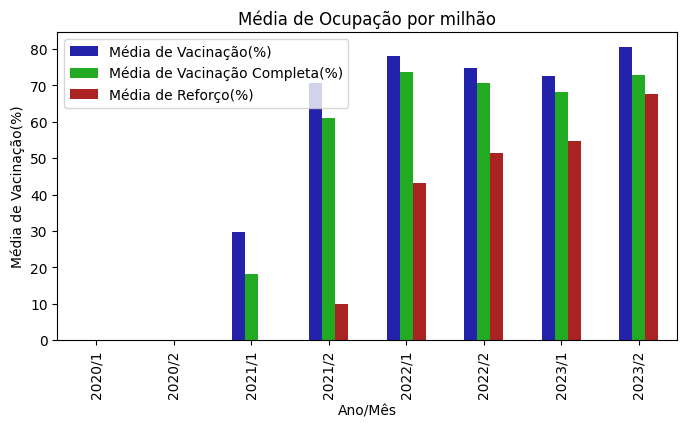

In [ ]:
#@title **Criar gráfico de barras da tabela acima**

from matplotlib import pyplot as plt

dfMediaVacinacaoSemestral['ano_semestre'] = dfMediaVacinacaoSemestral['Ano'].astype(str) + '/' + dfMediaVacinacaoSemestral['Semestre'].astype(str)

dfMediaVacinacaoSemestral.plot(
    x='ano_semestre',
    y=['Média de Vacinação(%)', 'Média de Vacinação Completa(%)', 'Média de Reforço(%)'],
    kind='bar',
    figsize=(8, 4),
    title='Média de Ocupação por milhão',
    color=['#2222aa', '#22aa22', '#aa2222']
)



plt.gca().spines[['top', 'right']].set_visible(True)

plt.xlabel('Ano/Mês')
plt.ylabel('Média de Vacinação(%)')

plt.show()

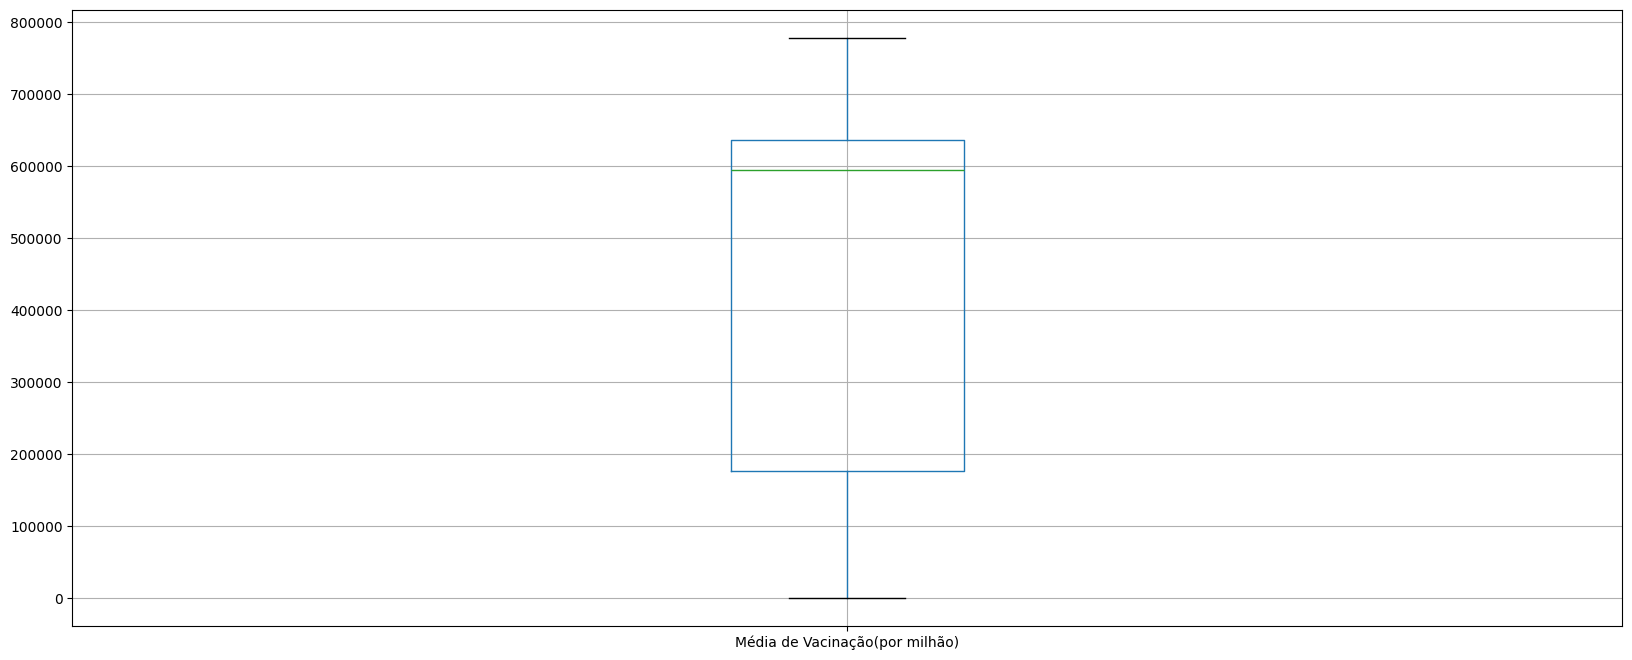

In [ ]:
#@title **BoxPlot Média de Vacinação(por milhão)**

bp = dfMediaVacinacaoSemestral.boxplot(column=['Média de Vacinação(por milhão)'], figsize=(20,8))

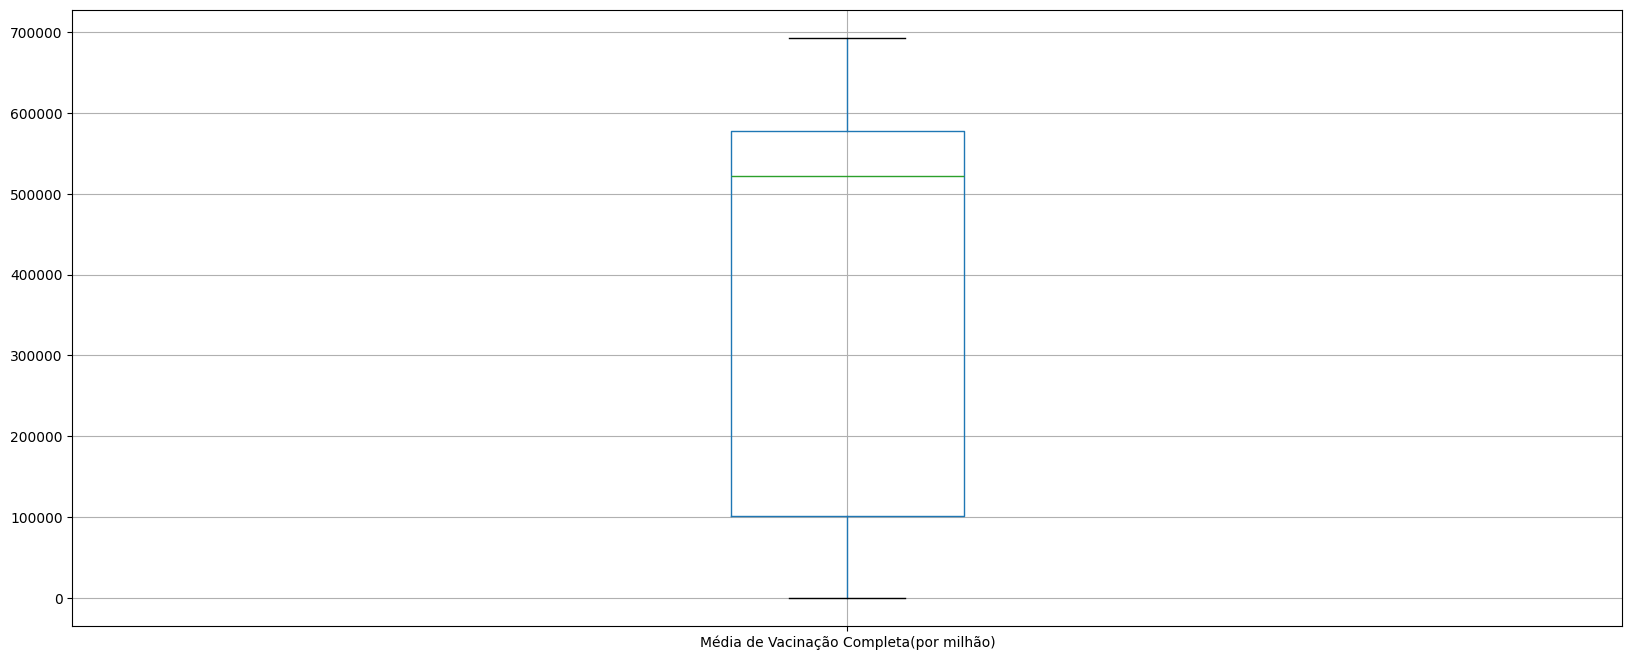

In [ ]:
#@title **BoxPlot Média de Vacinação Completa(por milhão)**

bp = dfMediaVacinacaoSemestral.boxplot(column=['Média de Vacinação Completa(por milhão)'], figsize=(20,8))

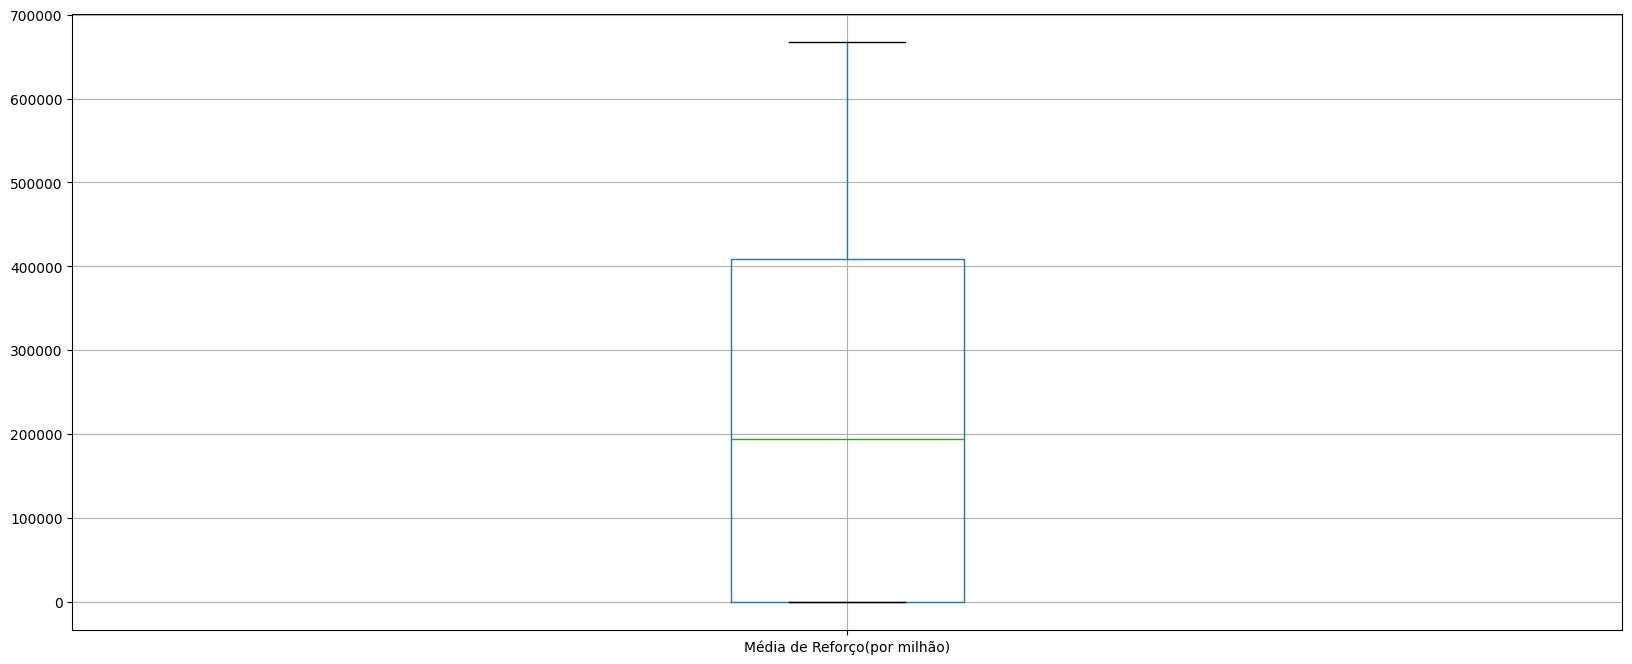

In [ ]:
#@title **BoxPlot Média de Reforço(por milhão)**

bp = dfMediaVacinacaoSemestral.boxplot(column=['Média de Reforço(por milhão)'], figsize=(20,8))

In [ ]:
#@title **Calcular Média e Mediana de vacinação em diferentes meses entre 2020 e 2023**

import pandas as pd

# Função para calcular a média mensal
def calcularMediaMesVacina(df, ano, mes, dataInicio, dataFim):
    # Filtrar os dados
    filtro =  ((df['date'] >= dataInicio) & (df['date'] <= dataFim))


    # Filtrar o DataFrame
    vacinaFiltrado = df[filtro]

    # Agrupar por 'date' e 'entity' e somar 'value'
    vacinaAgrupado = vacinaFiltrado.groupby(['date', 'location'], as_index=False).agg(
        {
            'people_vaccinated_per_hundred': 'mean',
            'people_fully_vaccinated_per_hundred': 'mean',
            'people_with_booster_per_hundred': 'mean'
        }
    )

    # Calcular a média do semestre
    vacina1MesMedia = vacinaAgrupado['people_vaccinated_per_hundred'].mean()
    vacina2MesMedia = vacinaAgrupado['people_fully_vaccinated_per_hundred'].mean()
    vacina3MesMedia = vacinaAgrupado['people_with_booster_per_hundred'].mean()


    novaEntrada = {'Ano': ano, 'Mes': mes, 'Média de Vacinação(%)': vacina1MesMedia, 'Média de Vacinação Completa(%)': vacina2MesMedia, 'Média de Reforço(%)': vacina3MesMedia,}
    mediaGeralVacina.append(novaEntrada)


# Lista para armazenar as médias mensais
mediaGeralVacina = []

# Lista de anos para análise
anos = [2020, 2021, 2022, 2023]

# Loop para calcular as médias mensais
for ano in anos:
    # Filtrar a base de vacinação
    vacinaDfFiltrado = vacinaDf[vacinaDf['location'].isin(paisesComum)]

    # Loop para cada mês do ano
    for mes in range(1, 13):  # Meses de 1 a 12
        # Definir o primeiro e o último dia do mês
        dataInicio = f'{ano}-{mes:02d}-01'  # Formato YYYY-MM-DD
        if mes == 12:
            dataFim = f'{ano}-12-31'  # Último dia de dezembro
        else:
            dataFim = f'{ano}-{mes+1:02d}-01'  # Primeiro dia do próximo mês

        # Calcular a média do mês
        calcularMediaMesVacina(
            vacinaDfFiltrado, ano, mes, dataInicio, dataFim
        )

# Criar o DataFrame com as médias mensais
dfMediaVacinacaoMensal = pd.DataFrame(mediaGeralVacina)

# Criar o Filtro para a data máxima ser Setembro de 2023
filtro = ((dfMediaVacinacaoMensal['Ano'] < 2023) | (dfMediaVacinacaoMensal['Mes'] <= 9))
dfMediaVacinacaoMensal = dfMediaVacinacaoMensal[filtro]

# Exibir o DataFrame
dfMediaVacinacaoMensal

,Ano,Mes,Média de Vacinação(%),Média de Vacinação Completa(%),Média de Reforço(%)
0,2020,1,0.000000,0.000000,0.000000
1,2020,2,0.000000,0.000000,0.000000
2,2020,3,0.000000,0.000000,0.000000
3,2020,4,0.000000,0.000000,0.000000
4,2020,5,0.000000,0.000000,0.000000
5,2020,6,0.000000,0.000000,0.000000
6,2020,7,0.000000,0.000000,0.000000
7,2020,8,0.000000,0.000000,0.000000
8,2020,9,0.000000,0.000000,0.000000
9,2020,10,0.000000,0.000000,0.000000


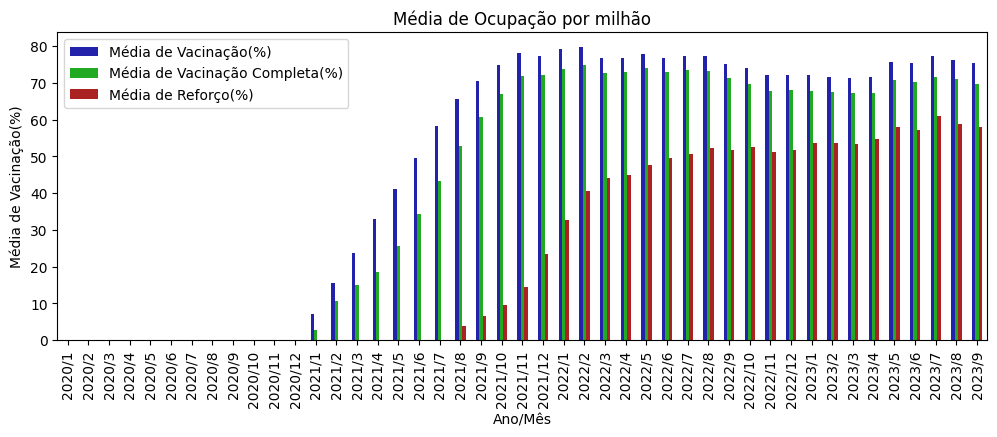

In [ ]:
#@title **Criar gráfico de barras da tabela acima**

from matplotlib import pyplot as plt

dfMediaVacinacaoMensal['ano_mes'] = dfMediaVacinacaoMensal['Ano'].astype(str) + '/' + dfMediaVacinacaoMensal['Mes'].astype(str)

dfMediaVacinacaoMensal.plot(
    x='ano_mes',
    y=['Média de Vacinação(%)', 'Média de Vacinação Completa(%)', 'Média de Reforço(%)'],
    kind='bar',
    figsize=(12, 4),
    title='Média de Ocupação por milhão',
    color=['#2222aa', '#22aa22', '#aa2222']
)



plt.gca().spines[['top', 'right']].set_visible(True)

plt.xlabel('Ano/Mês')
plt.ylabel('Média de Vacinação(%)')

plt.show()

In [ ]:
#@title **Medidas de Variação**

# Médias

mediaHospital = dfMediaOcupacaoSemestral['Média de Ocupação por milhão'].mean()

mediaVacina1 = dfMediaVacinacaoSemestral['Média de Vacinação(%)'].mean()
mediaVacina2 = dfMediaVacinacaoSemestral['Média de Vacinação Completa(%)'].mean()
mediaVacina3 = dfMediaVacinacaoSemestral['Média de Reforço(%)'].mean()

# Variancia
varianciaHospital = dfMediaOcupacaoSemestral['Média de Ocupação por milhão'].var()

varianciaVacina1 = dfMediaVacinacaoSemestral['Média de Vacinação(%)'].var()
varianciaVacina2 = dfMediaVacinacaoSemestral['Média de Vacinação Completa(%)'].var()
varianciaVacina3 = dfMediaVacinacaoSemestral['Média de Reforço(%)'].var()


# Desvio Padrão
desvioPadraoHospital = dfMediaOcupacaoSemestral['Média de Ocupação por milhão'].std()

desvioPadraoVacina1 = dfMediaVacinacaoSemestral['Média de Vacinação(%)'].std()
desvioPadraoVacina2 = dfMediaVacinacaoSemestral['Média de Vacinação Completa(%)'].std()
desvioPadraoVacina3 = dfMediaVacinacaoSemestral['Média de Reforço(%)'].std()

# ampliture interquartil
quartisHospital = dfMediaOcupacaoSemestral['Média de Ocupação por milhão'].quantile([0.25, 0.75])
interQuartilHospital = quartisHospital.iloc[1] - quartisHospital.iloc[0]

quartisVacina1 = dfMediaVacinacaoSemestral['Média de Vacinação(%)'].quantile([0.25, 0.75])
interQuartilVacina1 = quartisVacina1.iloc[1] - quartisVacina1.iloc[0]

quartisVacina2 = dfMediaVacinacaoSemestral['Média de Vacinação Completa(%)'].quantile([0.25, 0.75])
interQuartilVacina2 = quartisVacina2.iloc[1] - quartisVacina2.iloc[0]

quartisVacina3 = dfMediaVacinacaoSemestral['Média de Reforço(%)'].quantile([0.25, 0.75])
interQuartilVacina3 = quartisVacina3.iloc[1] - quartisVacina3.iloc[0]

# Coeficiente de Variação

coeficienteHospital = desvioPadraoHospital*100 / dfMediaOcupacaoSemestral['Média de Ocupação por milhão'].mean()

coeficienteVacina1 = desvioPadraoVacina1*100 / dfMediaVacinacaoSemestral['Média de Vacinação(%)'].mean()
coeficienteVacina2 = desvioPadraoVacina2*100 / dfMediaVacinacaoSemestral['Média de Vacinação Completa(%)'].mean()
coeficienteVacina3 = desvioPadraoVacina3*100 / dfMediaVacinacaoSemestral['Média de Reforço(%)'].mean()




# organizando em um dataframe
resultado = pd.DataFrame({
    'Base':['Hospital', 'Vacinação', 'Vacinação Completa', 'Reforço'],
    'Média':[mediaHospital, mediaVacina1, mediaVacina2, mediaVacina3],
    'Variância':[varianciaHospital, varianciaVacina1, varianciaVacina2, varianciaVacina3],
    'Desvio Padrão':[desvioPadraoHospital, desvioPadraoVacina1, desvioPadraoVacina2, desvioPadraoVacina3],
    'Interquartil':[interQuartilHospital, interQuartilVacina1, interQuartilVacina2, interQuartilVacina3],
    'Coeficiente de Variação':[coeficienteHospital, coeficienteVacina1, coeficienteVacina2, coeficienteVacina3]} ).set_index('Base')


resultado

,Média,Variância,Desvio Padrão,Interquartil,Coeficiente de Variação
Base,,,,,
Hospital,2783.847687,3.475489e+06,1864.266310,2409.392019,66.967253
Vacinação,50.813985,1.241714e+03,35.237960,53.341469,69.346972
Vacinação Completa,45.614131,1.117541e+03,33.429641,57.566893,73.287904
Reforço,28.377907,8.205397e+02,28.645063,52.284450,100.941422


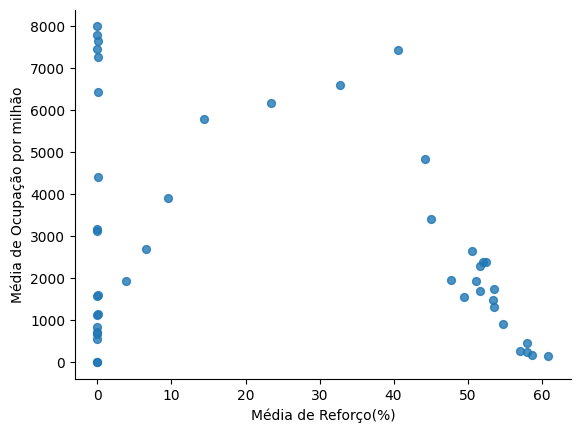

In [ ]:
#@title **Regressão Linear**

dfMediaOcupacaoMensal['ano_mes'] = dfMediaOcupacaoMensal['Ano'].astype(str) + '/' + dfMediaOcupacaoMensal['Mês'].astype(str)

#Unir colunas específicas de dois DataFrames
uniao_dict = {
    'ano_mes': dfMediaOcupacaoMensal['ano_mes'],
    'Média de Ocupação por milhão': dfMediaOcupacaoMensal['Média de Ocupação por milhão'],
    'Média de Reforço(%)': dfMediaVacinacaoMensal['Média de Reforço(%)']
}

#converter união em DataFrame
uniao_df = pd.DataFrame(uniao_dict)




from matplotlib import pyplot as plt

uniao_df.plot(kind='scatter', x='Média de Reforço(%)', y='Média de Ocupação por milhão', s=32, alpha=.8)

plt.gca().spines[['top', 'right',]].set_visible(False)



**PROBABILIDADE**

In [ ]:
#@title **Teorema de Bayes**
#FAZER ALGO RELACIONADO AO TEOREMA DE BAYES. USAR UM POUCO MAIS A SEPARAÇÃO POR IDADE

# Filtrar dados da Argentina e faixa etária 12-17
# Filtrar os dados
filtro =  ((hospitalDfFiltrado['indicator'] == 'Daily ICU occupancy per million') | \
              (hospitalDfFiltrado['indicator'] == 'Daily hospital occupancy per million')) & \
              (hospitalDfFiltrado['entity'] == 'Argentina') & \
             ((hospitalDfFiltrado['date'] >= '01-07-2021') & (hospitalDfFiltrado['date'] <= '31-12-2021'))

# Filtrar o DataFrame
hospitalFiltrado = hospitalDfFiltrado[filtro]

# Criando tabela pivoteada e garantindo que não haja NaNs
dfPivotHospital = hospitalFiltrado.pivot_table(index="date", columns="indicator", values="value", aggfunc='sum').reset_index()

# Verificar se todas as colunas esperadas existem
colunasExistem = ['Daily ICU occupancy per million', 'Daily hospital occupancy per million']
for coluna in colunasExistem:
      if coluna not in dfPivotHospital.columns:
          dfPivotHospital[coluna] = 0  # Adicionar coluna ausente com valores 0

dfPivotHospital.columns = ["date", "ICU_per_million", "hospital_per_million"]


# Preencher possíveis valores NaN com 0
dfPivotHospital = dfPivotHospital.fillna(0)

dfPivotHospital['total_diario'] = dfPivotHospital[["ICU_per_million", "hospital_per_million"]].sum(axis=1)


df_vacinacao_arg = vacinaDfFiltrado[(vacinaDfFiltrado['location'] == 'Argentina') & \
                    (vacinaDfFiltrado['age_group'] == '12-17') &\
                    (vacinaDfFiltrado['date'] >= '01-07-2021') & (vacinaDfFiltrado['date'] <= '31-12-2021')]

# Calcular P(A): Probabilidade de hospitalização (média de hospitalizados por milhão)

P_A = dfPivotHospital['total_diario'].mean() / 1_000_000  # Converter para probabilidade


# Calcular P(B): Probabilidade de ter tomado a segunda dose (média de fully vaccinated por 100)
P_B = df_vacinacao_arg['people_fully_vaccinated_per_hundred'].mean() / 100  # Converter para probabilidade

# Assumir P(B|A): Probabilidade de ter tomado a segunda dose dado que foi hospitalizado
# Este valor foi colocado como 100%
P_B_given_A = 1

# Aplicar o Teorema de Bayes
P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"Probabilidade de hospitalização dado que tomou a segunda dose: {P_A_given_B:.6f}")

Probabilidade de hospitalização dado que tomou a segunda dose: 0.000189


**INFERÊNCIA**

Vacinados entre 10 e 14 anos:
 count    27.000000
mean     25.629259
std      19.253010
min       0.010000
25%       0.505000
50%      38.480000
75%      41.910000
max      43.830000
Name: people_fully_vaccinated_per_hundred, dtype: float64

Vacinados entre 60 e 69 anos:
 count    27.000000
mean     85.643704
std       8.640967
min      51.200000
25%      86.950000
50%      88.980000
75%      89.405000
max      89.970000
Name: people_fully_vaccinated_per_hundred, dtype: float64


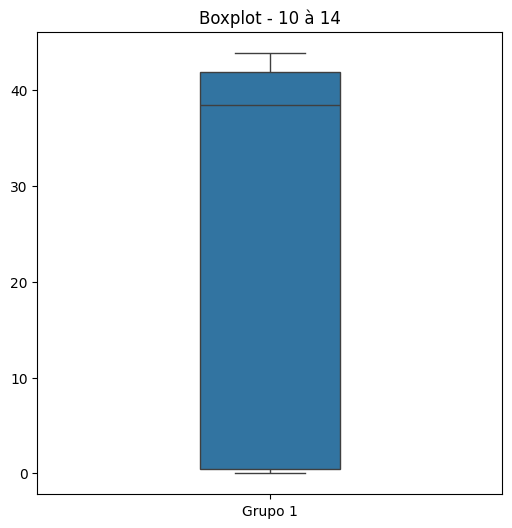

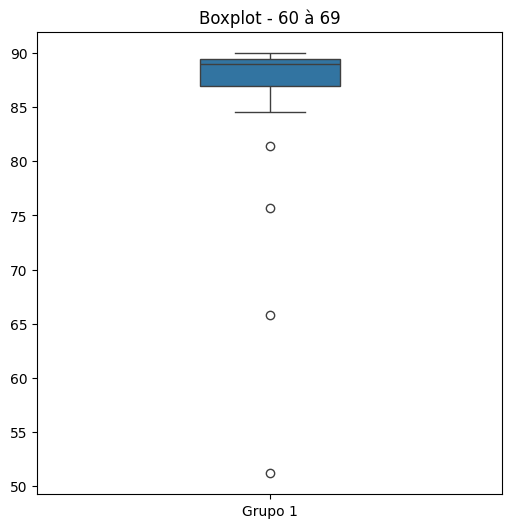

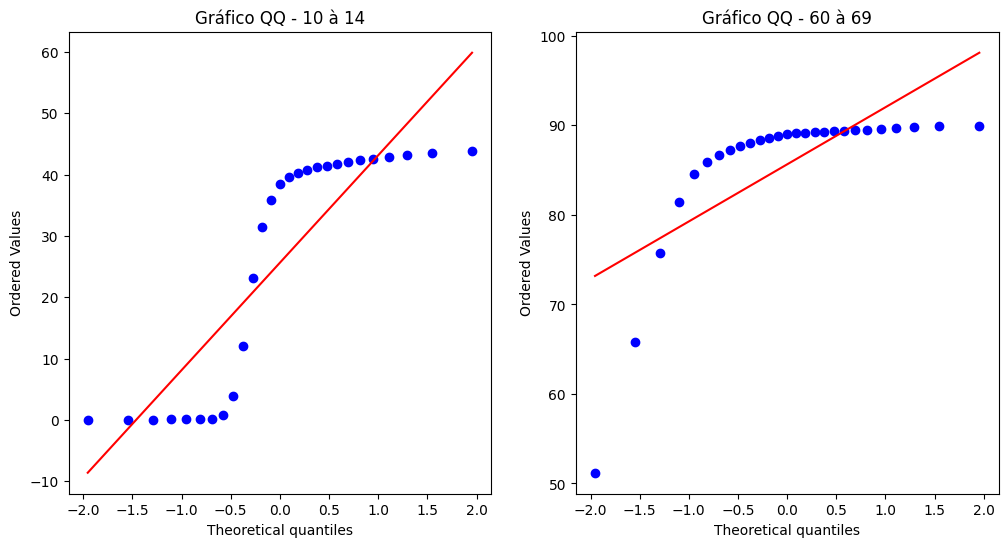

In [ ]:
#@title **INFERÊNCIA**

# teste t:  comparar as taxas médias de vacinação de duas faixas etárias de um país
#ANOVA:   comparar as taxas de vacinação de vários grupos etários num determinado país para ver se existem diferenças  gritantes na cobertura de vacinação entre eles
#o chi-quadrado pode ver se tem mt diferença entre duas categorias, por ex se faixa 18/24 eh mt menor que 25/32
import seaborn as sns
from scipy import stats

# fazer filtro de grupo de idade 1 entre 01-07-2021 e 31-12-2021
filtro1 = (vacinaDfFiltrado['location'] == 'Spain') & \
          (vacinaDfFiltrado['date'] >= '2021-07-01') & (vacinaDfFiltrado['date'] <= '2021-12-31') & \
          (vacinaDfFiltrado['age_group'] == '10-14')

# aplicar filtro
Grupo1 = vacinaDfFiltrado[filtro1]
#média de porcentagem de pessoas totalmente vacinadas entre 01-07-2021 e 31-12-2021 de 10 à 14 anos
print('Vacinados entre 10 e 14 anos:\n',Grupo1['people_fully_vaccinated_per_hundred'].describe())

# fazer filtro de grupo de idade 2 entre 01-07-2021 e 31-12-2021
filtro2 = (vacinaDfFiltrado['location'] == 'Spain') & \
          (vacinaDfFiltrado['date'] >= '2021-07-01') & (vacinaDfFiltrado['date'] <= '2021-12-31') & \
          (vacinaDfFiltrado['age_group'] == '60-69')

# aplicar filtro
Grupo2 = vacinaDfFiltrado[filtro2]

#média de porcentagem de pessoas totalmente vacinadas entre 01-07-2021 e 31-12-2021 de 60 à 69 anos
print('\nVacinados entre 60 e 69 anos:\n',Grupo2['people_fully_vaccinated_per_hundred'].describe())




# Boxplot Grupo1
plt.figure(figsize=(6, 6))
sns.boxplot(data=[Grupo1['people_fully_vaccinated_per_hundred']], width=0.3)
plt.xticks([0], ['Grupo 1'])
plt.title('Boxplot - 10 à 14')
plt.show()

# Boxplot Grupo2
plt.figure(figsize=(6, 6))
sns.boxplot(data=[Grupo2['people_fully_vaccinated_per_hundred']], width=0.3)
plt.xticks([0], ['Grupo 1'])
plt.title('Boxplot - 60 à 69')
plt.show()


# QQ plots - Verificam visualmente a normalidade
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

stats.probplot(Grupo1['people_fully_vaccinated_per_hundred'], dist="norm", plot=ax[0])
ax[0].set_title('Gráfico QQ - 10 à 14')

stats.probplot(Grupo2['people_fully_vaccinated_per_hundred'], dist="norm", plot=ax[1])
ax[1].set_title('Gráfico QQ - 60 à 69')
plt.show()

